## Objective

Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

Porter works with a wide range of restaurants for delivering their items directly to the people.

Thus the objective is to analyze the dataset to accurately predict delivery times for different orders. Our goal is to build a regression model using neural networks, evaluate its performance, and provide insights for optimizing delivery operations.

In [402]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [312]:
df=pd.read_csv('dataset.csv')
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [314]:
df.shape

(197428, 14)

In [315]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
market_id,196441.0,2.978706,1.524867,1.0,2.0,3.0,4.0,6.0
order_protocol,196433.0,2.882352,1.503771,1.0,1.0,3.0,4.0,7.0
total_items,197428.0,3.196391,2.666546,1.0,2.0,3.0,4.0,411.0
subtotal,197428.0,2682.331402,1823.093688,0.0,1400.0,2200.0,3395.0,27100.0
num_distinct_items,197428.0,2.670791,1.630255,1.0,1.0,2.0,3.0,20.0
min_item_price,197428.0,686.218470,522.038648,-86.0,299.0,595.0,949.0,14700.0
max_item_price,197428.0,1159.588630,558.411377,0.0,800.0,1095.0,1395.0,14700.0
total_onshift_partners,181166.0,44.808093,34.526783,-4.0,17.0,37.0,65.0,171.0
total_busy_partners,181166.0,41.739747,32.145733,-5.0,15.0,34.0,62.0,154.0
total_outstanding_orders,181166.0,58.050065,52.661830,-6.0,17.0,41.0,85.0,285.0


In [322]:
df.nunique()

market_id                        6
created_at                  180985
actual_delivery_time        178110
store_id                      6743
store_primary_category          74
order_protocol                   7
total_items                     57
subtotal                      8368
num_distinct_items              20
min_item_price                2312
max_item_price                2652
total_onshift_partners         172
total_busy_partners            159
total_outstanding_orders       281
dtype: int64

#### Insights

1. The dataset has 197428 rows ans  14 columns.
2. Average number of items ordered is 3 and maximum number of items ordered is 411.
3. Average minimum price of an item ordered is 686.218470
4. Average maximum price of an item ordered is 1159.588630
5. Average numbers of delivery parteners available at a time is 44

## Data preprocessing and Feature engineering 

#### Data cleaning

Convert 'created at' and 'actual delivery time' to timestamp type

In [323]:
#convert created at and actual delivery time to timestamp type
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])


In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 196441 non-null  float64       
 1   created_at                197428 non-null  datetime64[ns]
 2   actual_delivery_time      197421 non-null  datetime64[ns]
 3   store_id                  197428 non-null  object        
 4   store_primary_category    192668 non-null  object        
 5   order_protocol            196433 non-null  float64       
 6   total_items               197428 non-null  int64         
 7   subtotal                  197428 non-null  int64         
 8   num_distinct_items        197428 non-null  int64         
 9   min_item_price            197428 non-null  int64         
 10  max_item_price            197428 non-null  int64         
 11  total_onshift_partners    181166 non-null  float64       
 12  to

#### Duplicate value check,

In [325]:
duplicate_count = df.duplicated().sum()
duplicate_count

np.int64(0)

There are no duplicate rows in the dataset

#### Missing value treatment

In [326]:
df.isna().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

Null values are present in columns 'market_id', 'actual_delivery_time ','store_primary_category','order_protocol','total_onshift_partners','total_busy_partners' and 'total_outstanding_orders'

In [327]:
df=df.dropna()

In [328]:
df.shape

(176248, 14)

After dropping rows with null values we have 176248 rows and 14 columns.

#### Creating the target column (time taken for delivery) from order timestamp and delivery timestamp

In [329]:
df['time_duration']=df['actual_delivery_time']-df['created_at']

In [330]:
df['time_duration'].info()

<class 'pandas.core.series.Series'>
Index: 176248 entries, 0 to 197427
Series name: time_duration
Non-Null Count   Dtype          
--------------   -----          
176248 non-null  timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 2.7 MB


In [331]:
df['time_duration'] = df['time_duration'].dt.total_seconds() / 60


In [332]:
df['time_duration'].head()

0     62.983333
1     67.066667
8     26.433333
14    37.883333
15    49.800000
Name: time_duration, dtype: float64

In [333]:
df['time_duration'] = df['time_duration'].round(2)

In [334]:
df['time_duration'].head()

0     62.98
1     67.07
8     26.43
14    37.88
15    49.80
Name: time_duration, dtype: float64

#### Getting hour and day of the week

In [335]:
df['hour']=df['created_at'].dt.hour
df['day']=df['created_at'].dt.dayofweek

In [336]:
df[['hour','day']].head()

,hour,day
0,22,4
1,21,1
8,0,0
14,3,3
15,2,1


#### Encoding Categorical Features

In [337]:
df['store_primary_category'].unique()

array(['american', 'mexican', 'indian', 'italian', 'sandwich', 'thai',
       'cafe', 'salad', 'pizza', 'chinese', 'singaporean', 'burger',
       'mediterranean', 'japanese', 'greek', 'catering', 'filipino',
       'convenience-store', 'other', 'vegan', 'asian', 'barbecue',
       'breakfast', 'fast', 'dessert', 'smoothie', 'seafood',
       'vietnamese', 'cajun', 'steak', 'middle-eastern', 'persian',
       'nepalese', 'korean', 'sushi', 'latin-american', 'chocolate',
       'burmese', 'hawaiian', 'british', 'pasta', 'alcohol', 'vegetarian',
       'dim-sum', 'peruvian', 'turkish', 'ethiopian', 'bubble-tea',
       'german', 'french', 'caribbean', 'gluten-free', 'comfort-food',
       'gastropub', 'afghan', 'pakistani', 'moroccan', 'tapas',
       'malaysian', 'soup', 'brazilian', 'european', 'cheese', 'african',
       'argentine', 'kosher', 'irish', 'spanish', 'russian', 'southern',
       'lebanese', 'belgian', 'alcohol-plus-food'], dtype=object)

In [338]:
df['store_primary_category'].nunique()

73

Since there are 73 categories we will proceed with target encoding

In [339]:
df['store_primary_category_encoded']=df.groupby('store_primary_category')['time_duration'].transform('mean')

In [340]:
df[['store_primary_category','store_primary_category_encoded']].head()

,store_primary_category,store_primary_category_encoded
0,american,47.875169
1,mexican,44.329756
8,indian,50.408359
14,italian,50.287886
15,italian,50.287886


The feature store_primary_category has been target encoded into a different column store_primary_category_encoded as we still need the categories for data visualisation.

# Data visualization and cleaning

### Univariate Analysis for categorical and Numerical columns

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72],
 [Text(0, 0, 'american'),
  Text(1, 0, 'mexican'),
  Text(2, 0, 'indian'),
  Text(3, 0, 'italian'),
  Text(4, 0, 'sandwich'),
  Text(5, 0, 'thai'),
  Text(6, 0, 'cafe'),
  Text(7, 0, 'salad'),
  Text(8, 0, 'pizza'),
  Text(9, 0, 'chinese'),
  Text(10, 0, 'singaporean'),
  Text(11, 0, 'burger'),
  Text(12, 0, 'mediterranean'),
  Text(13, 0, 'japanese'),
  Text(14, 0, 'greek'),
  Text(15, 0, 'catering'),
  Text(16, 0, 'filipino'),
  Text(17, 0, 'convenience-store'),
  Text(18, 0, 'other'),
  Text(19, 0, 'vegan'),
  Text(20, 0, 'asian'),
  Text(21, 0, 'barbecue'),
  T

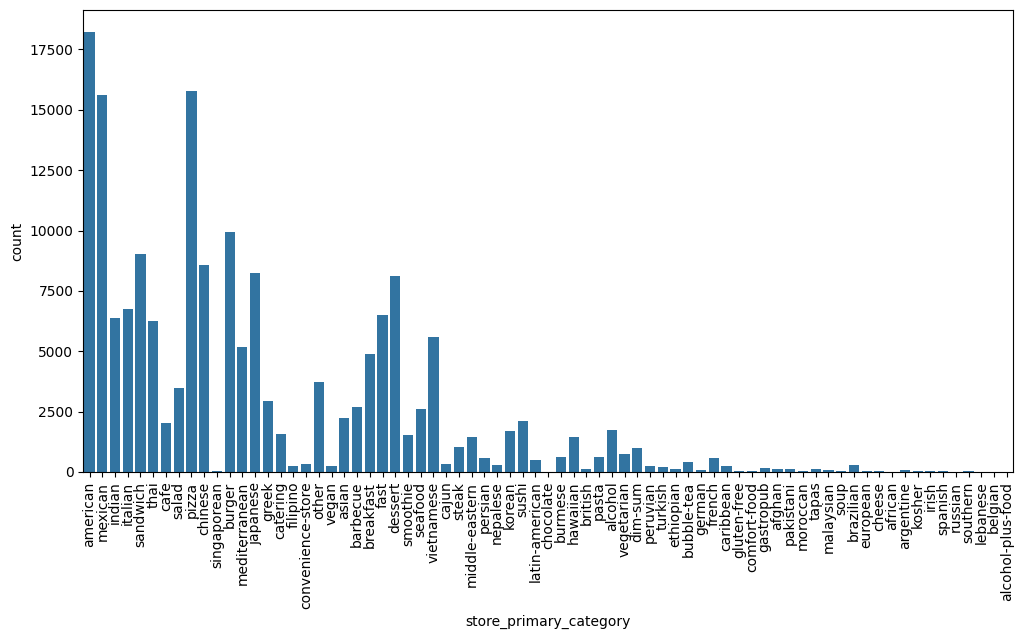

In [341]:
plt.figure(figsize=(12, 6))
sns.countplot(df,x=df['store_primary_category'])
plt.xticks(rotation=90)

Maximum orders are from American stores followed by pizza restraunts and maxican restraunts.

<Axes: xlabel='time_duration', ylabel='Density'>

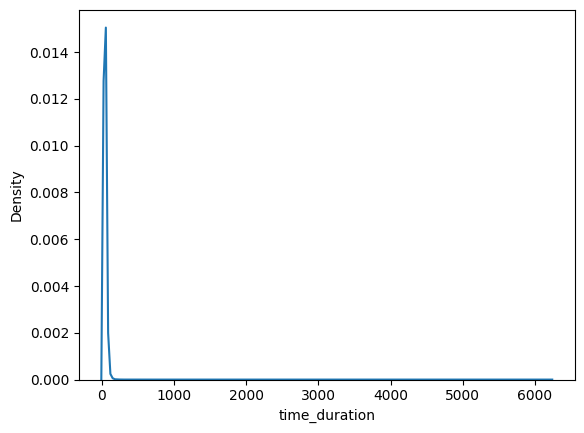

In [342]:
sns.kdeplot(df,x=df['time_duration'])

Maximum orders are delivered within an hour

<Axes: xlabel='market_id', ylabel='Count'>

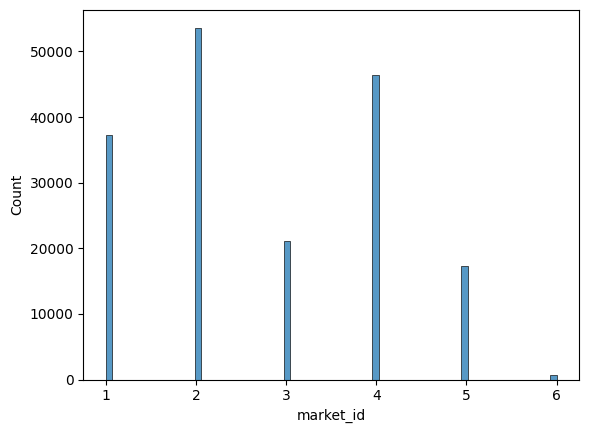

In [343]:
sns.histplot(df,x=df['market_id'])

Maximum orders are from market id 2 followed by market id 4

<Axes: xlabel='order_protocol', ylabel='Count'>

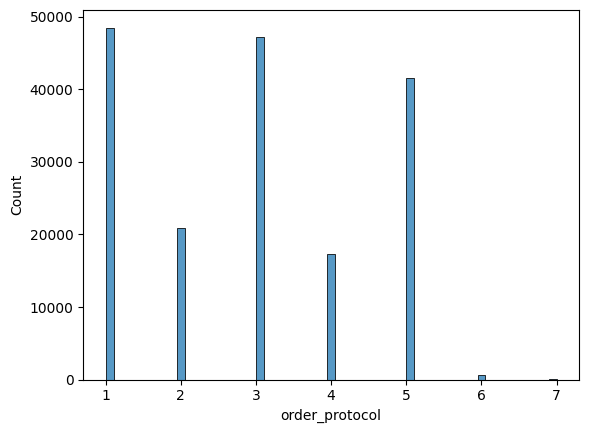

In [344]:
sns.histplot(df,x=df['order_protocol'])

Maximum orders are placed via order protocol 1 and 3 followed by order protocol 5

<Axes: xlabel='total_items', ylabel='count'>

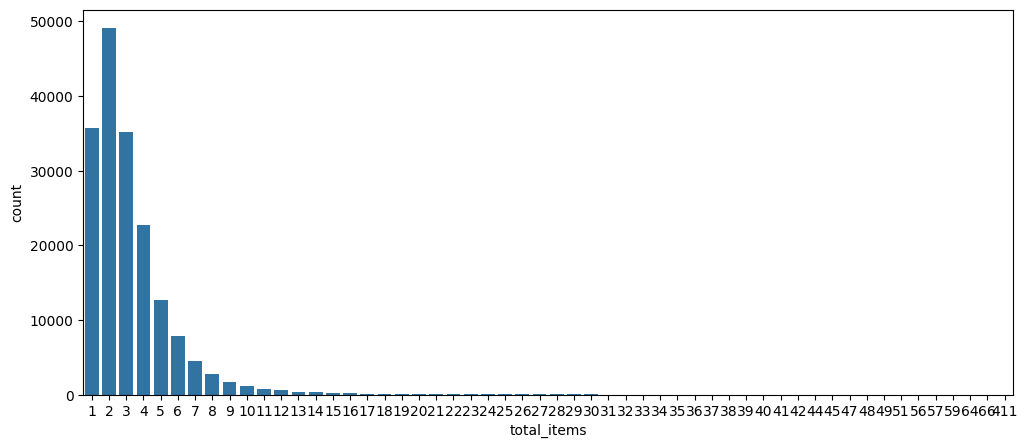

In [345]:
plt.figure(figsize=(12, 5))
sns.countplot(df,x=df['total_items'])

Maximum orders placed  contain 2 items

<Axes: xlabel='subtotal'>

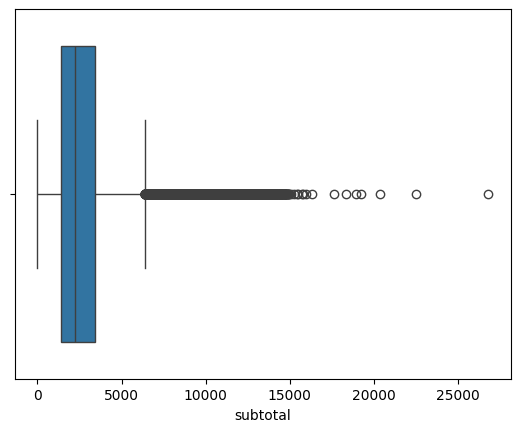

In [346]:
sns.boxplot(df,x=df['subtotal'])

Average price of an order is between 2000 to 3000

<Axes: xlabel='num_distinct_items', ylabel='count'>

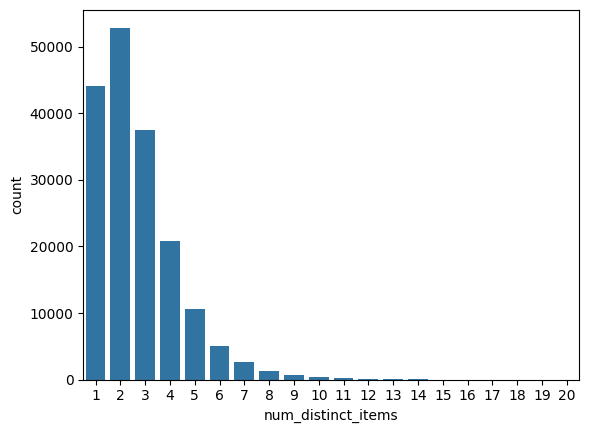

In [347]:
sns.countplot(df,x=df['num_distinct_items'])

An order on an average  contains upto 5 unique items

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(-25.0, 0, '−25'),
  Text(0.0, 0, '0'),
  Text(25.0, 0, '25'),
  Text(50.0, 0, '50'),
  Text(75.0, 0, '75'),
  Text(100.0, 0, '100'),
  Text(125.0, 0, '125'),
  Text(150.0, 0, '150'),
  Text(175.0, 0, '175'),
  Text(200.0, 0, '200')])

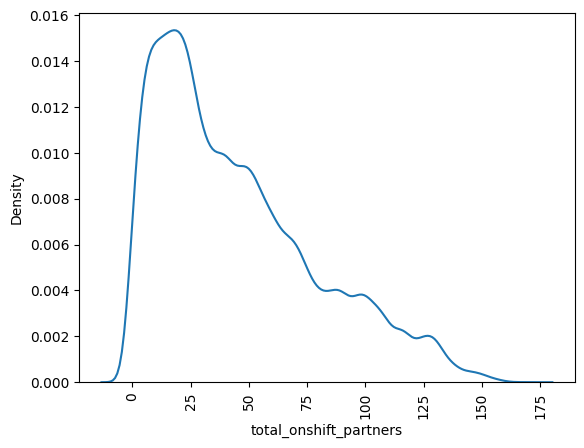

In [348]:
sns.kdeplot(df,x=df['total_onshift_partners'])
plt.xticks(rotation=90)

There are maximum of 20 to 27 delivery partners available at a time.

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175.]),
 [Text(-25.0, 0, '−25'),
  Text(0.0, 0, '0'),
  Text(25.0, 0, '25'),
  Text(50.0, 0, '50'),
  Text(75.0, 0, '75'),
  Text(100.0, 0, '100'),
  Text(125.0, 0, '125'),
  Text(150.0, 0, '150'),
  Text(175.0, 0, '175')])

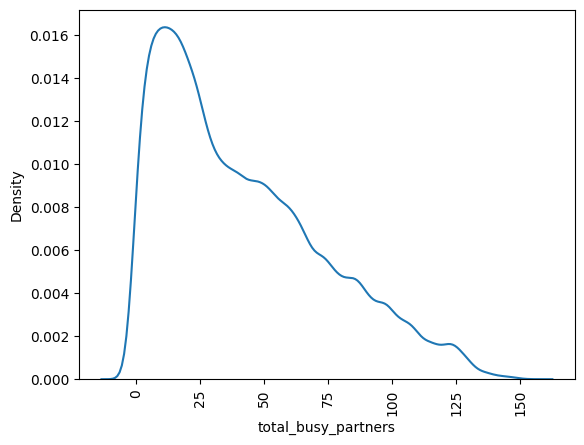

In [349]:
sns.kdeplot(df,x=df['total_busy_partners'])
plt.xticks(rotation=90)

Maximum of 20 to 25 delivery people are busy at atime.

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(-50.0, 0, '−50'),
  Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300'),
  Text(350.0, 0, '350')])

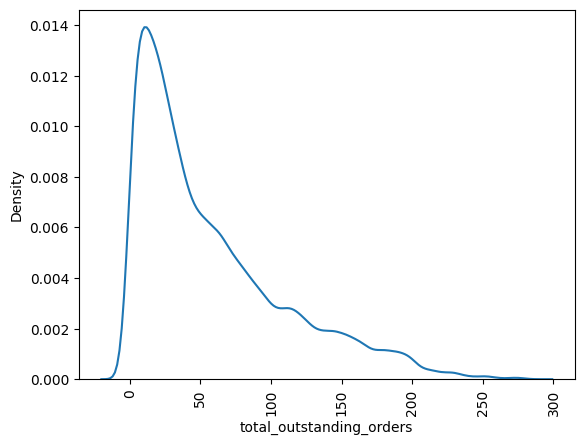

In [350]:
sns.kdeplot(df,x=df['total_outstanding_orders'])
plt.xticks(rotation=90)

At a time an average  of 10 to 30 orders come in.

## Bivariate Analysis

<Axes: xlabel='market_id', ylabel='time_duration'>

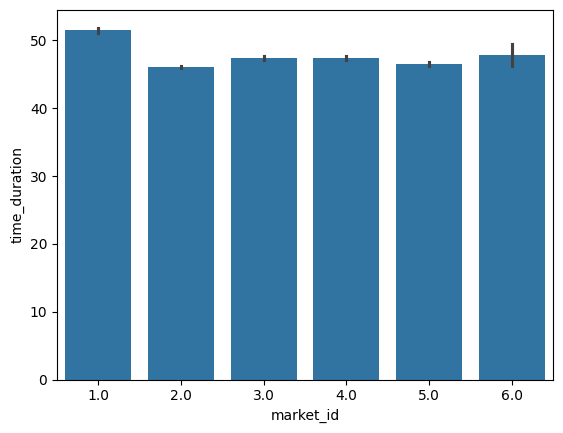

In [351]:
sns.barplot(df,x=df['market_id'],y=df['time_duration'])

Longest time taken to deliver order is from market id 1 followed by market id 6

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72],
 [Text(0, 0, 'american'),
  Text(1, 0, 'mexican'),
  Text(2, 0, 'indian'),
  Text(3, 0, 'italian'),
  Text(4, 0, 'sandwich'),
  Text(5, 0, 'thai'),
  Text(6, 0, 'cafe'),
  Text(7, 0, 'salad'),
  Text(8, 0, 'pizza'),
  Text(9, 0, 'chinese'),
  Text(10, 0, 'singaporean'),
  Text(11, 0, 'burger'),
  Text(12, 0, 'mediterranean'),
  Text(13, 0, 'japanese'),
  Text(14, 0, 'greek'),
  Text(15, 0, 'catering'),
  Text(16, 0, 'filipino'),
  Text(17, 0, 'convenience-store'),
  Text(18, 0, 'other'),
  Text(19, 0, 'vegan'),
  Text(20, 0, 'asian'),
  Text(21, 0, 'barbecue'),
  T

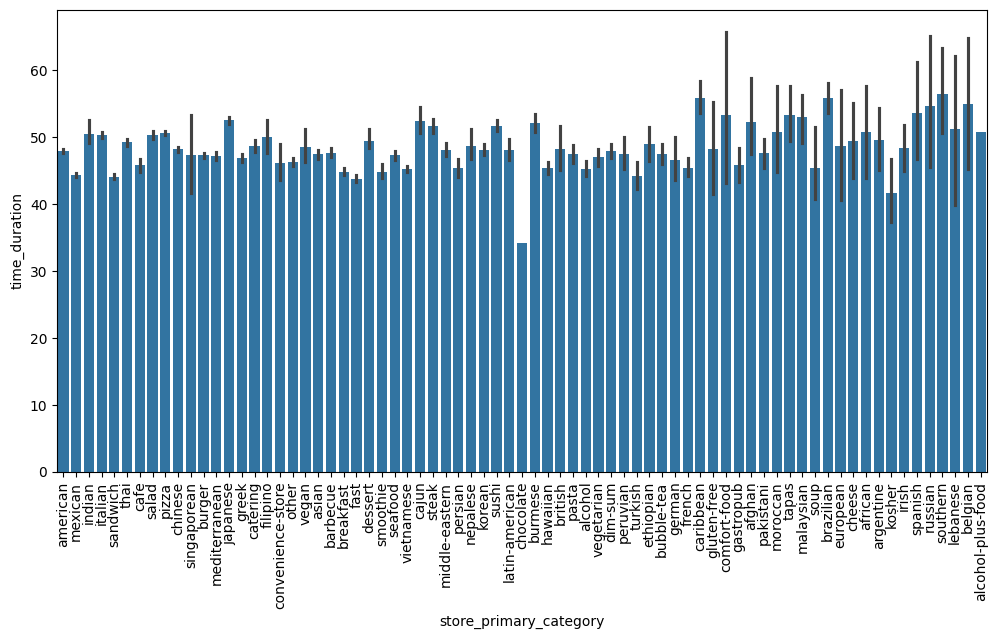

In [352]:
plt.figure(figsize=(12, 6))
sns.barplot(df,x=df['store_primary_category'],y=df['time_duration'])
plt.xticks(rotation=90)

comfort_ food, belgian, lebnese,southern, russian and spanish stores generally take longer time to deliver the food.

<Axes: xlabel='order_protocol', ylabel='time_duration'>

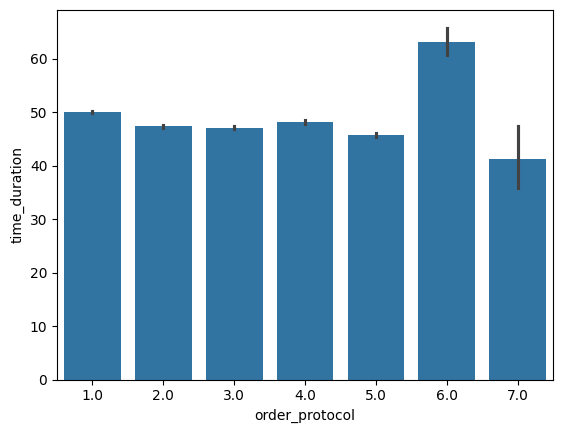

In [353]:
sns.barplot(df,x=df['order_protocol'],y=df['time_duration'])

Orders placed via order_protocol generally take longer to get delivered.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31'),
  Text(31, 0, '32'),
  Text(32, 0, '33'),
  Text(33, 

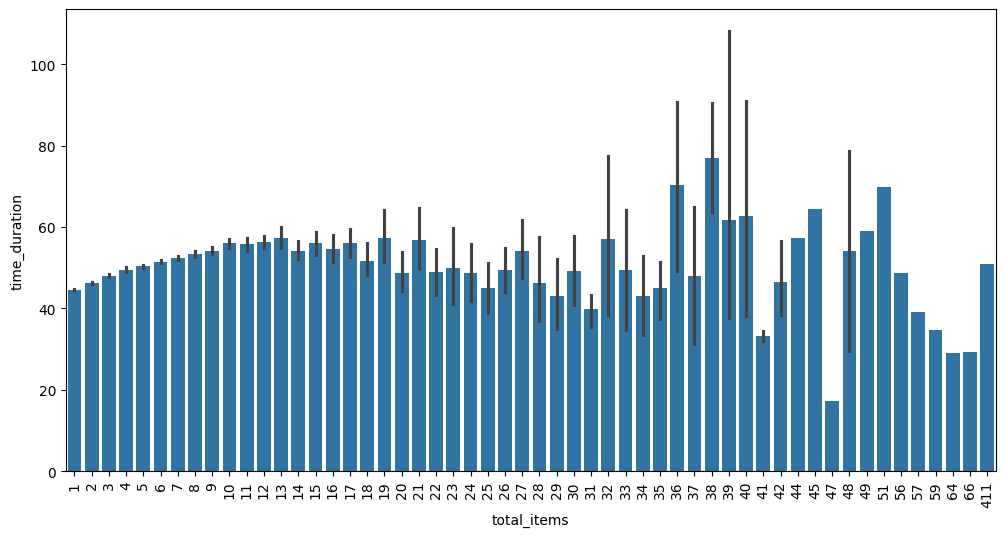

In [354]:
plt.figure(figsize=(12, 6))
sns.barplot(df,x=df['total_items'],y=df['time_duration'])
plt.xticks(rotation=90)

A clear relationship cannot be inferred by number of items and time_duration of delivery.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31'),
  Text(31, 0, '32'),
  Text(32, 0, '33'),
  Text(33, 

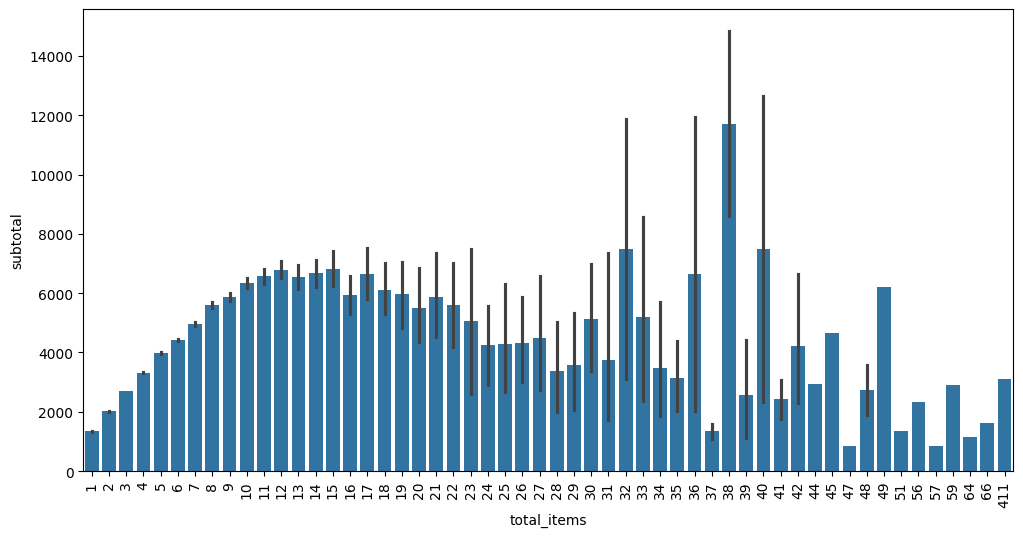

In [355]:
plt.figure(figsize=(12, 6))
sns.barplot(df,x=df['total_items'],y=df['subtotal'])
plt.xticks(rotation=90)

As number of items increases the total price also increases except for some orders , These orders could be the ones with many items but of lower price.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '14'),
  Text(10, 0, '15'),
  Text(11, 0, '16'),
  Text(12, 0, '17'),
  Text(13, 0, '18'),
  Text(14, 0, '19'),
  Text(15, 0, '20'),
  Text(16, 0, '21'),
  Text(17, 0, '22'),
  Text(18, 0, '23')])

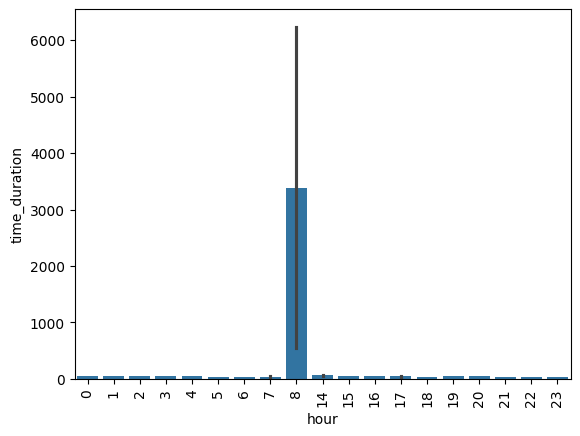

In [356]:

sns.barplot(df,x=df['hour'],y=df['time_duration'])
plt.xticks(rotation=90)

Orders placed during 8 in the morning take longer to deliver , could be because of a lot of issues such as orders are more during thi hour, or traffic is more during this time e.t.c.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

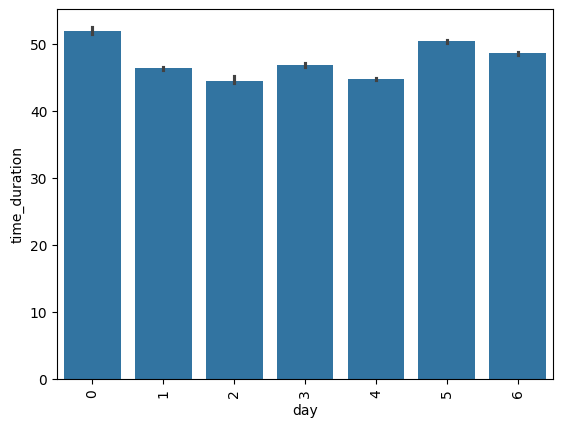

In [357]:
sns.barplot(df,x=df['day'],y=df['time_duration'])
plt.xticks(rotation=90)

Orders placed on day 0(mondays ) generally take longer to get delivered.

#### Checking Outliers

In [358]:
cols=['total_items', 'subtotal','num_distinct_items', 'min_item_price', 'max_item_price','total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'time_duration', 'hour', 'day','store_primary_category_encoded']

<function matplotlib.pyplot.show(close=None, block=None)>

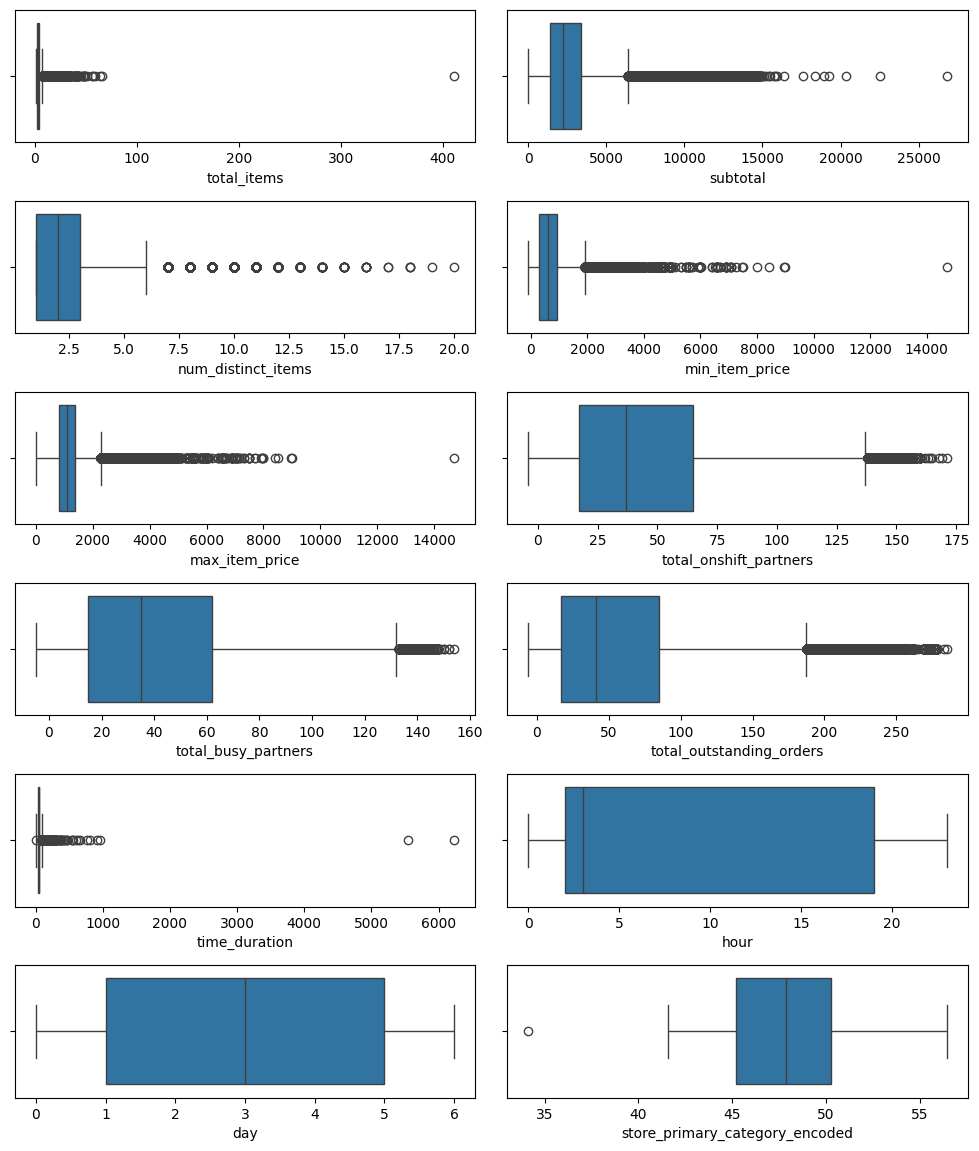

In [359]:
a=8
b=2
c=1
fig=plt.figure(figsize=(10,15))
for i in cols:
    plt.subplot(a,b,c)
    sns.boxplot(x=df[i])
    c=c+1

plt.tight_layout()
plt.show

The Features 'total_items', 'subtotal','num_distinct_items', 'min_item_price', 'max_item_price','total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'time_duration' contains outliers.

In [360]:
def remove_Outlier(col,df):
    q1=col.quantile(0.25)
    q3=col.quantile(0.75)
    iqr=q3-q1

    maxx=q3 + 1.5 * iqr
    minn=q1 - 1.5 * iqr
    return df.loc[(col>=minn)&(col<=maxx)]

In [361]:
for i in cols:
    df=remove_Outlier(df[i],df)

<function matplotlib.pyplot.show(close=None, block=None)>

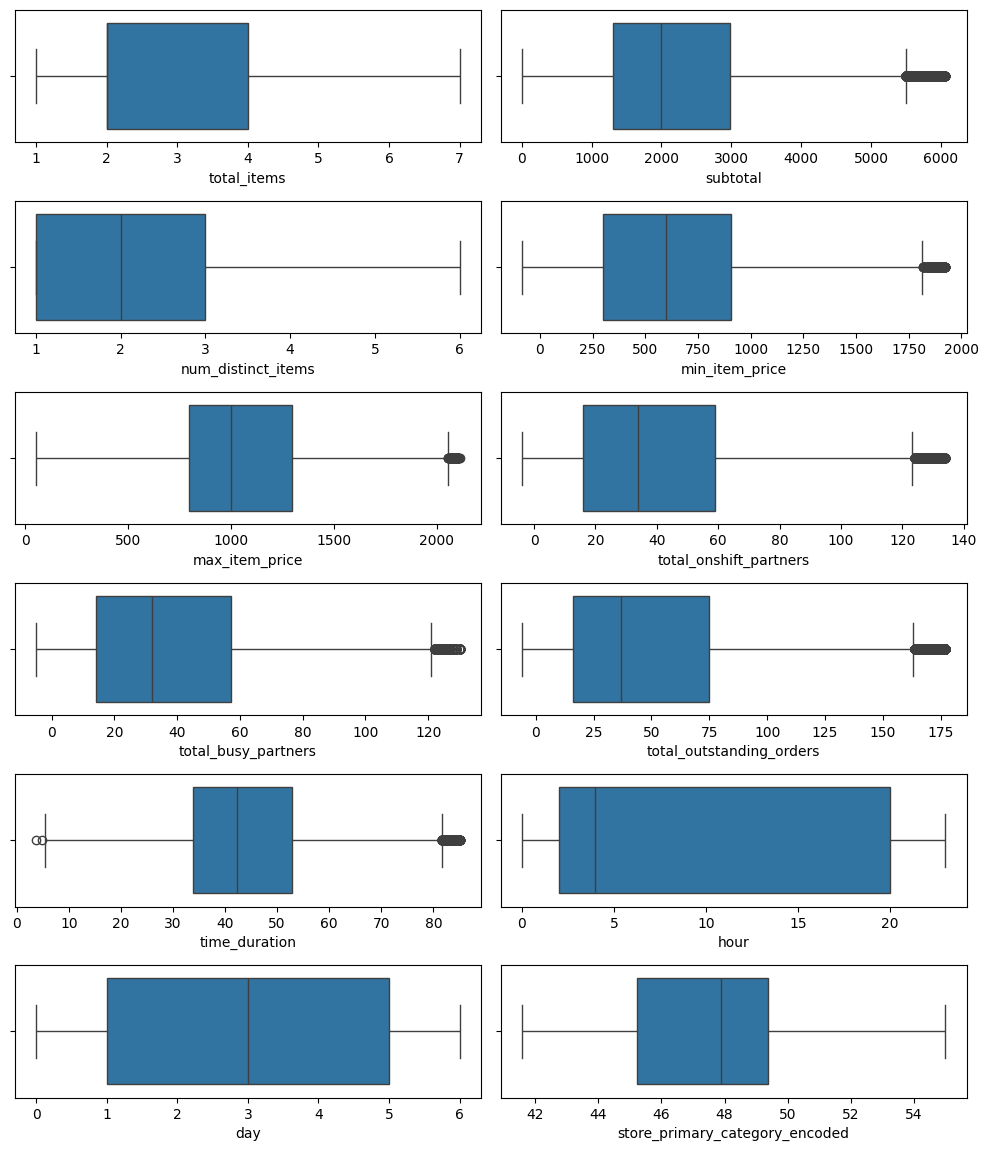

In [362]:
a=8
b=2
c=1
fig=plt.figure(figsize=(10,15))
for i in cols:
    plt.subplot(a,b,c)
    sns.boxplot(x=df[i])
    c=c+1

plt.tight_layout()
plt.show

Reduced a lot of outliers

### Insights

1. Orders places from stores at market_id 1 face longer delivery time may be because Marget_id 1 could be farther than other market_ids. or  it may be the busiest market thus taking longer delivery time.

2. Orders on day 0 takes longer to get delivered as it may be the busiest day of the week.

3. Compared to all hours of the day hour 8 seems to take longer to deliver food.

4. People ordering via protcol 6 may face longer delivery time.

## Regression with neural networks 

#### Data splitting

In [363]:
x=df.drop(['created_at', 'actual_delivery_time','store_primary_category','store_id','time_duration'], axis=1)
y=df['time_duration']

In [364]:
from sklearn.model_selection import train_test_split

x_dev, x_test, y_dev, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_dev, y_dev, test_size=0.1, random_state=42)

#### Data scaling

In [365]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(x_train,y_train)
X_val = scaler.transform(x_val)
X_test = scaler.transform(x_test)

In [366]:
print('Train : ', X_train.shape, y_train.shape)
print('Valid : ', X_val.shape, y_val.shape)
print('Test  : ', X_test.shape, y_test.shape)

Train :  (114704, 13) (114704,)
Valid :  (12745, 13) (12745,)
Test  :  (14162, 13) (14162,)


## Model building

In [367]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [368]:
L2Reg = tf.keras.regularizers.L2(l2=1e-6)
model1 = Sequential()

model1.add(Dense(32, activation="relu",input_dim=13))
model1.add(Dense(64, activation="relu", kernel_regularizer = L2Reg))
model1.add(Dense(128, activation="relu", kernel_regularizer = L2Reg))
model1.add(Dense(64, activation="relu", kernel_regularizer = L2Reg))
model1.add(Dense(32, activation="relu", kernel_regularizer = L2Reg))
model1.add(Dense(1))


c:\Users\sasmi\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [369]:
model1.compile(optimizer='adam', loss='mean_squared_error')

In [370]:
history=model1.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 345.0163 - val_loss: 167.4455
Epoch 2/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 165.6953 - val_loss: 168.4117
Epoch 3/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 163.1295 - val_loss: 161.8126
Epoch 4/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 162.0398 - val_loss: 164.3551
Epoch 5/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 160.2565 - val_loss: 160.5104
Epoch 6/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 159.3590 - val_loss: 173.3321
Epoch 7/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 160.0304 - val_loss: 159.9513
Epoch 8/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 158.7160 - val_loss: 158.9500
Epoch 9/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 158.6203 - val_loss: 159.1325
Epoch 10/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 157.4312 - val_loss: 161.9640
Epoch 11/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 157.3946 - val_l

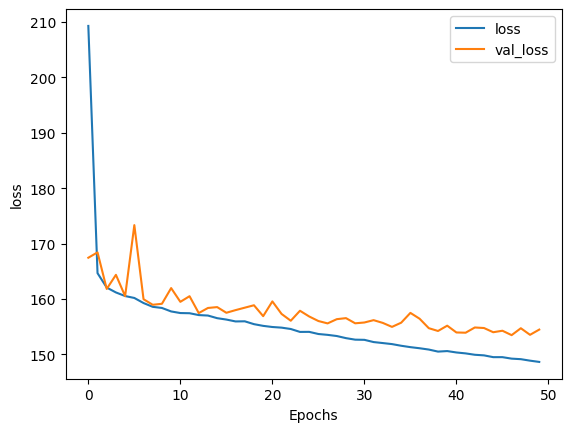

In [371]:
def plot_history(history,key):
    plt.plot(history.history[key])
    plt.plot(history.history['val_'+key])
    plt.xlabel("Epochs")
    plt.ylabel(key)
    plt.legend([key,'val_'+key])
    plt.show()
#plot the history
plot_history(history,'loss')

model is underfitting, Lets try Learning Rate decay

In [372]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [373]:
def scheduler(epoch, lr):
  r_0 = 0.01
  lr = (1/(1+r_0*epoch))*lr

  return lr

In [374]:
LRdecay = LearningRateScheduler(scheduler)

In [375]:
model2=Sequential()

model2.add(Dense(32, activation="relu",input_dim=13))
model2.add(Dense(64, activation="relu", kernel_regularizer = L2Reg))
model2.add(Dense(128, activation="relu", kernel_regularizer = L2Reg))
model2.add(Dense(64, activation="relu", kernel_regularizer = L2Reg))
model2.add(Dense(32, activation="relu", kernel_regularizer = L2Reg))
model2.add(Dense(1))

c:\Users\sasmi\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [376]:
model2.compile(optimizer=tf.keras.optimizers.Adam(beta_1 = 0.9, beta_2 = 0.999 ), loss='mean_squared_error')

In [377]:
history = model2.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val),callbacks=[LRdecay])


Epoch 1/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 383.5303 - val_loss: 167.1223 - learning_rate: 0.0010
Epoch 2/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 164.3838 - val_loss: 164.1946 - learning_rate: 9.9010e-04
Epoch 3/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 163.3930 - val_loss: 164.3124 - learning_rate: 9.7069e-04
Epoch 4/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 160.6435 - val_loss: 166.8935 - learning_rate: 9.4241e-04
Epoch 5/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 158.9677 - val_loss: 163.7873 - learning_rate: 9.0617e-04
Epoch 6/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 159.9243 - val_loss: 160.6382 - learning_rate: 8.6302e-04
Epoch 7/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 158.7236 - val_loss: 160.8832 - learning_rate: 8.1417e-04
Epoch 8/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 158.9209 - val_loss: 160.0636 - learning_rate: 7.6090e-04
Epoch 9/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 4s

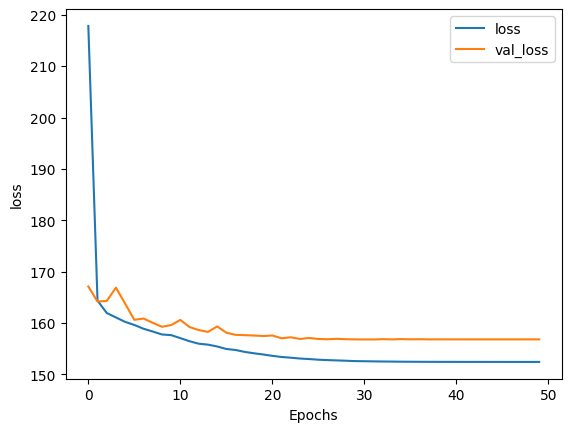

In [378]:
plot_history(history,'loss')


Validation loss is still more than training loss so model is slightly overfitting .
We try  droupout and  use activation function as LeakyRelu.

In [379]:
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dropout
model3 = Sequential()
model3.add(Dense(32, activation="relu", input_dim=13))
model3.add(Dropout(0.3))
model3.add(Dense(64, activation=LeakyReLU(alpha=0.1)))
model3.add(Dropout(0.3))
model3.add(Dense(128, activation=LeakyReLU(alpha=0.1)))
model3.add(Dropout(0.3))
model3.add(Dense(64, activation=LeakyReLU(alpha=0.1)))
model3.add(Dropout(0.3))
model3.add(Dense(32, activation=LeakyReLU(alpha=0.1)))
model3.add(Dropout(0.3))
model3.add(Dense(1))

c:\Users\sasmi\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\sasmi\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [380]:
model3.compile(optimizer=tf.keras.optimizers.Adam(beta_1 = 0.9, beta_2 = 0.999 ), loss='mean_squared_error')

In [381]:
history = model3.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val),callbacks=[LRdecay])

Epoch 1/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 447.4427 - val_loss: 175.7485 - learning_rate: 0.0010
Epoch 2/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 220.7792 - val_loss: 166.5968 - learning_rate: 9.9010e-04
Epoch 3/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 210.7436 - val_loss: 168.8026 - learning_rate: 9.7069e-04
Epoch 4/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 201.4656 - val_loss: 167.4851 - learning_rate: 9.4241e-04
Epoch 5/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 199.8169 - val_loss: 168.1052 - learning_rate: 9.0617e-04
Epoch 6/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 194.6451 - val_loss: 161.7138 - learning_rate: 8.6302e-04
Epoch 7/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 192.8911 - val_loss: 165.3101 - learning_rate: 8.1417e-04
Epoch 8/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 189.0176 - val_loss: 167.2564 - learning_rate: 7.6090e-04
Epoch 9/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 6s

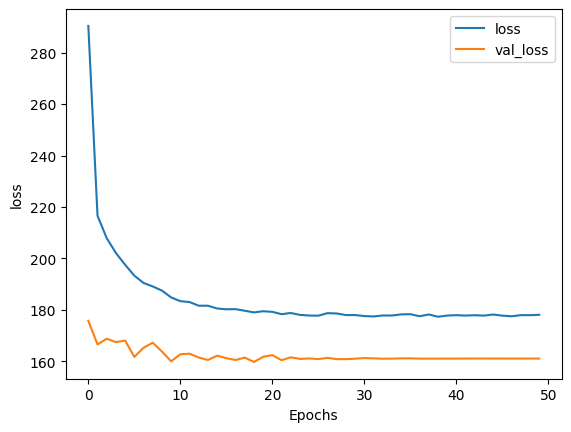

In [382]:
plot_history(history,'loss')

Droupout does decrease the validation Loss

In [383]:
history = model3.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val),callbacks=[LRdecay])

Epoch 1/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 176.4191 - val_loss: 161.0961 - learning_rate: 2.4502e-08
Epoch 2/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 177.5617 - val_loss: 161.0958 - learning_rate: 2.4259e-08
Epoch 3/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 178.0402 - val_loss: 161.0963 - learning_rate: 2.3784e-08
Epoch 4/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 177.8297 - val_loss: 161.0958 - learning_rate: 2.3091e-08
Epoch 5/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 177.7060 - val_loss: 161.0958 - learning_rate: 2.2203e-08
Epoch 6/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 178.5973 - val_loss: 161.0965 - learning_rate: 2.1146e-08
Epoch 7/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 177.1838 - val_loss: 161.0965 - learning_rate: 1.9949e-08
Epoch 8/50
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 178.4232 - val_loss: 161.0970 - learning_rate: 1.8644e-08
Epoch 9/50
1793/1793 ━━━━━━━━━━━━━━━━━━━

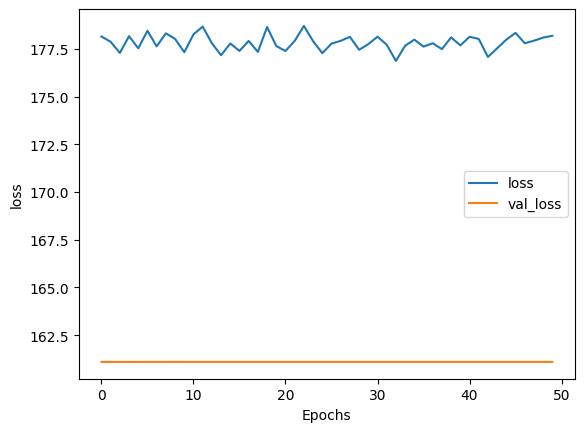

In [384]:
plot_history(history,'loss')

Running model3 for more epochs doesnot give a significant decrease in loss.

In [385]:
x_dev2, x_test2, y_dev2, y_test2 = train_test_split(x, y, test_size=0.3, random_state=42)
x_train2, x_val2, y_train2, y_val2 = train_test_split(x_dev, y_dev, test_size=0.3, random_state=42)

In [386]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train2 = scaler.fit_transform(x_train2,y_train2)
X_val2 = scaler.transform(x_val2)
X_test2 = scaler.transform(x_test2)

In [387]:
print('Train : ', X_train2.shape, y_train2.shape)
print('Valid : ', X_val2.shape, y_val2.shape)
print('Test  : ', X_test2.shape, y_test2.shape)

Train :  (89214, 13) (89214,)
Valid :  (38235, 13) (38235,)
Test  :  (42484, 13) (42484,)


In [399]:
model4 = Sequential()
model4.add(Dense(32, activation="relu", input_dim=13))
model4.add(Dropout(0.3))
model4.add(Dense(64, activation=LeakyReLU(alpha=0.1)))
model4.add(Dropout(0.3))
model4.add(Dense(128, activation=LeakyReLU(alpha=0.1)))
model4.add(Dropout(0.3))
model4.add(Dense(64, activation=LeakyReLU(alpha=0.1)))
model4.add(Dropout(0.3))
model4.add(Dense(32, activation=LeakyReLU(alpha=0.1)))
model4.add(Dropout(0.3))
model4.add(Dense(1))

c:\Users\sasmi\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\sasmi\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [400]:
model4.compile(optimizer=tf.keras.optimizers.Adam(beta_1 = 0.9, beta_2 = 0.999 ), loss='mean_squared_error')

In [401]:
history=model4.fit(X_train2, y_train2, epochs=50, batch_size=64, validation_data=(X_val2, y_val2),callbacks=[LRdecay])

Epoch 1/50
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 466.7446 - val_loss: 175.6122 - learning_rate: 0.0010
Epoch 2/50
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 222.5654 - val_loss: 171.1397 - learning_rate: 9.9010e-04
Epoch 3/50
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 211.4820 - val_loss: 178.1525 - learning_rate: 9.7069e-04
Epoch 4/50
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 204.2387 - val_loss: 163.7455 - learning_rate: 9.4241e-04
Epoch 5/50
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 202.1093 - val_loss: 165.2808 - learning_rate: 9.0617e-04
Epoch 6/50
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 200.2412 - val_loss: 168.9695 - learning_rate: 8.6302e-04
Epoch 7/50
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 194.9851 - val_loss: 168.0559 - learning_rate: 8.1417e-04
Epoch 8/50
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 193.7818 - val_loss: 165.1261 - learning_rate: 7.6090e-04
Epoch 9/50
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 2s

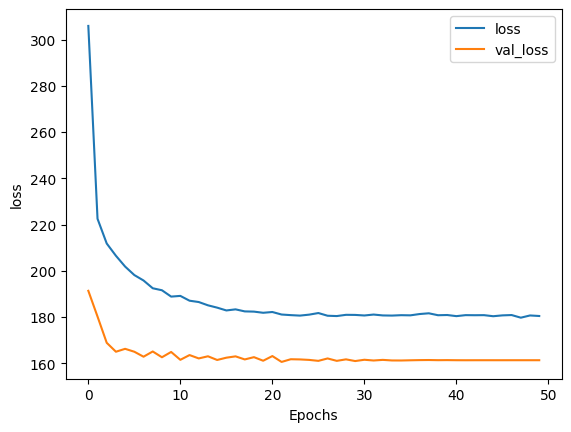

In [391]:
plot_history(history,'loss')

Running it for more epochs to see if it performs better.

In [404]:
history=model4.fit(X_train2, y_train2, epochs=50, batch_size=64, validation_data=(X_val2, y_val2),callbacks=[LRdecay])

Epoch 1/50
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 182.0286 - val_loss: 161.9594 - learning_rate: 2.4502e-08
Epoch 2/50
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 178.7040 - val_loss: 161.9599 - learning_rate: 2.4259e-08
Epoch 3/50
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 179.1617 - val_loss: 161.9607 - learning_rate: 2.3784e-08
Epoch 4/50
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 180.8663 - val_loss: 161.9601 - learning_rate: 2.3091e-08
Epoch 5/50
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 180.3008 - val_loss: 161.9606 - learning_rate: 2.2203e-08
Epoch 6/50
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 180.3192 - val_loss: 161.9614 - learning_rate: 2.1146e-08
Epoch 7/50
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 180.3345 - val_loss: 161.9608 - learning_rate: 1.9949e-08
Epoch 8/50
1394/1394 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 179.2173 - val_loss: 161.9606 - learning_rate: 1.8644e-08
Epoch 9/50
1394/1394 ━━━━━━━━━━━━━━━━━━━

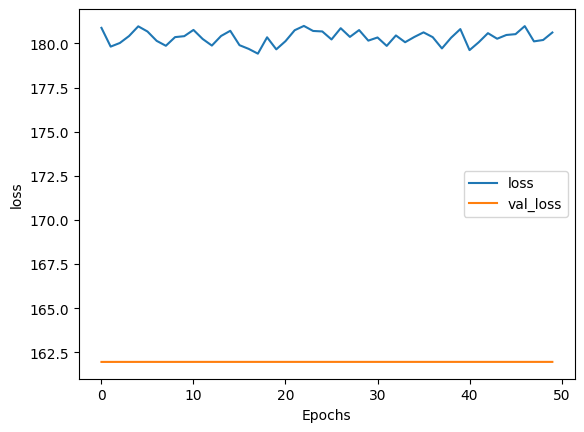

In [405]:
plot_history(history,'loss')

Running it for more epochs doesnot give much  drop in training or validation loss.

In [394]:
import sklearn
from sklearn.metrics import mean_absolute_error

In [395]:
y_pred = model1.predict(X_test)
mean_absolute_error(y_test,y_pred)

443/443 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step


np.float64(9.90346579070213)

In [396]:
y2_pred = model2.predict(X_test)
mean_absolute_error(y_test,y2_pred)

443/443 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step


np.float64(9.990188334825566)

In [397]:
y3_pred = model3.predict(X_test)
mean_absolute_error(y_test,y2_pred)

443/443 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step


np.float64(9.990188334825566)

In [406]:
y4_pred = model4.predict(X_test2)
mean_absolute_error(y_test2,y4_pred)

1328/1328 ━━━━━━━━━━━━━━━━━━━━ 1s 617us/step


np.float64(10.011272268904971)

#### Insights

The model performs best on first 3 to 4 epochs in model1 and  model2 after that it doesnot make any significant improvement.

This could be because for the same dish prepared by same restraunt delivery to same location may differ every time thus the variation in input.

model1 with adam optimiser and L2 reguraliser gives train loss: 148.9552 and  validation loss: 154.4703 

model2 with additional hyperparameter tuning of adam optimiser and using Learning Rate Decay gives training loss: 151.7911  and  validation loss: 156.8335  

model3 uses dropout rate 0f 0.3 and Leaky Relu as activation function gives training loss: 178.5572 and  validation loss: 161.0964  

model4 uses same parameters as model 3 but is used on different train validation and test size gives training loss: 179.9830  and  validation loss: 161.9616 

The model with least Mean absolute error is model1 with MAE of 9.90346579070213

### Recommendations 

1. Porter may Use Route Optimization Algorithms powered by AI and Machine Learning (ML) which will take into account real-time traffic, weather conditions, delivery priorities, and even the delivery window.

2. Porter may  allocate drivers efficiently by analyzing factors such as time of day, location, and order volume, you can ensure that drivers are allocated to high-demand areas or time slots.

3. Porter can offer customers flexible  delivery windows. By optimizing the time slots (e.g., grouping deliveries into 1-hour timeframes or offering flexible slots), which can reduce downtime between deliveries for drivers.

4. Porter may implement a driver performance monitoring system that tracks key performance metrics like on-time deliveries, fuel efficiency, and driving safety.

5. Porter can implement  customer feedback systems and post-delivery surveys to gather data on delivery times, driver performance, and overall satisfaction. Analyze this data to refine delivery routes, improve the customer experience, and better allocate resources.
